<a href="https://colab.research.google.com/github/ydev365/portfolio-for-internship/blob/main/3_%EB%8B%A8%EA%B3%84%EB%B3%84_%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**스마트폰 센서 데이터 기반 모션 분류**
# 단계3 : 단계별 모델링


## 0.미션4

* 단계별로 나눠서 모델링을 수행하고자 합니다.  
* 단계 구분 예시
    * 단계1 : 정적(0), 동적(1) 행동 분류 모델 생성
    * 단계2 : 세부 동작에 대한 분류모델 생성
        * 단계1 모델에서 0으로 예측 -> 정적 행동 3가지 분류 모델링
        * 단계1 모델에서 1으로 예측 -> 동적 행동 3가지 분류 모델링
* (선택) 모델 통합
    * 두 단계 모델을 통합하고, 새로운 데이터에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
* 성능 비교
    * 기본 모델링의 성능과 비교
    * 성능 가이드
        * Accuracy : 0.97 ~ 0.99
* (선택) 파이프라인 구성
    * test 데이터를 입력하여, 전처리 및 예측결과가 나오도록 함수 구성

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 구글콜랩
        * 구글 드라이브 바로 밑에 project3 폴더를 만들고,
        * 데이터 파일을 복사해 넣습니다.
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

* 구글 드라이브 연결

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/AIVLE/AI_미니프로젝트 1차_실습자료/'

### (2) 라이브러리 불러오기

* 라이브러리 로딩
  - pandas, numpy,matplotlib,seaborn, joblib, 모델링에 필요한 라이브러리를 로딩합니다.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import *

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.backend import clear_session
from keras.optimizers import Adam

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (3) 데이터 불러오기

* 주어진 데이터셋
    * data01_train.csv : 학습 및 검증용
    * data01_test.csv : 테스트용
    * feature.csv : feature 이름을 계층구조로 정리한 데이터

* 세부 요구사항
    * 칼럼 삭제 : data01_train.csv와 data01_test.csv 에서 'subject' 칼럼은 불필요하므로 삭제합니다.

#### 1) 데이터로딩

In [ ]:
# 주어진 데이터 셋을 불러오세요.(3개)

path = '/content/drive/MyDrive/AIVLE/AI_미니프로젝트 1차_실습자료/'
data01_train = pd.read_csv(path + 'data01_train.csv')
data01_test = pd.read_csv(path + 'data01_test.csv')
features = pd.read_csv(path + 'features.csv')

# 'subject' 칼럼 삭제
data01_train.drop(columns=['subject'], inplace=True)
data01_test.drop(columns=['subject'], inplace=True)

# 결과 확인
print("Train Data Shape:", data01_train.shape)
print("Test Data Shape:", data01_test.shape)
print("Features Data Shape:", features.shape)

Train Data Shape: (5881, 562)
Test Data Shape: (1471, 562)
Features Data Shape: (561, 4)


#### 2) 기본 정보 조회

In [ ]:
#전체 데이터의 행,열 개수 확인
print("\nTrain Data Shape:", data01_train.shape)
print("Test Data Shape:", data01_test.shape)
print("Features Data Shape:", features.shape)


Train Data Shape: (5881, 562)
Test Data Shape: (1471, 562)
Features Data Shape: (561, 4)


In [ ]:
#전체 데이터의 상위 5개 행 확인
print("\nTrain Data Head:")
print(data01_train.head())

print("\nTest Data Head:")
print(data01_test.head())

print("\nFeatures Data Head:")
print(features.head())


Train Data Head:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288508          -0.009196          -0.103362         -0.988986   
1           0.265757          -0.016576          -0.098163         -0.989551   
2           0.278709          -0.014511          -0.108717         -0.997720   
3           0.289795          -0.035536          -0.150354         -0.231727   
4           0.394807           0.034098           0.091229          0.088489   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.962797         -0.967422         -0.989000         -0.962596   
1         -0.994636         -0.987435         -0.990189         -0.993870   
2         -0.981088         -0.994008         -0.997934         -0.982187   
3         -0.006412         -0.338117         -0.273557          0.014245   
4         -0.106636         -0.388502         -0.010469         -0.109680   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X 

In [ ]:
#전체 데이터의 수치형 변수 분포 확인
print("\nTrain Data Description:")
print(data01_train.describe())

print("\nTest Data Description:")
print(data01_test.describe())


Train Data Description:
       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        5881.000000        5881.000000        5881.000000   
mean            0.274811          -0.017799          -0.109396   
std             0.067614           0.039422           0.058373   
min            -0.503823          -0.684893          -1.000000   
25%             0.262919          -0.024877          -0.121051   
50%             0.277154          -0.017221          -0.108781   
75%             0.288526          -0.010920          -0.098163   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       5881.000000       5881.000000       5881.000000       5881.000000   
mean          -0.603138         -0.509815         -0.604058         -0.628151   
std            0.448807          0.501815          0.417319          0.424345   
min           -1.000000         -0.999844         -0.999

In [ ]:
#전체 데이터의 모든 변수 확인
print("\nTrain Data Columns:")
print(data01_train.columns)

print("\nTest Data Columns:")
print(data01_test.columns)

print("\nFeatures Data Columns:")
print(features.columns)


Train Data Columns:
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

Test Data Columns:
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,

## 2.데이터 전처리

* 세부 요구사항
    - Label 추가 : 1단계 모델을 위한 레이블 추가
    - train : val = 8 : 2 혹은 7 : 3
    - random_state 옵션을 사용하여 다른 모델과 비교를 위해 성능이 재현되도록 합니다.

### (1) 1단계 모델링을 위한 레이블

In [ ]:
#Lable 추가(1단계 모델:정적(0), 동적(1) 행동 분류 모델 생성 )

# 정적 행동과 동적 행동 정의
static_actions = ['STANDING', 'SITTING', 'LAYING']
dynamic_actions = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']

# is_dynamic 레이블 추가
data01_train['is_dynamic'] = data01_train['Activity'].apply(lambda x: 1 if x in dynamic_actions else 0)
data01_test['is_dynamic'] = data01_test['Activity'].apply(lambda x: 1 if x in dynamic_actions else 0)

# 결과 확인
print(data01_train[['Activity', 'is_dynamic']].head())

             Activity  is_dynamic
0            STANDING           0
1              LAYING           0
2            STANDING           0
3             WALKING           1
4  WALKING_DOWNSTAIRS           1


### (2) x, y 분리

In [ ]:
#x,y 분리하기

X_train = data01_train.drop(columns=['Activity', 'is_dynamic'])
y_train = data01_train['is_dynamic']

X_test = data01_test.drop(columns=['Activity', 'is_dynamic'])
y_test = data01_test['is_dynamic']

# 결과 확인
print("Train Features Shape:", X_train.shape)
print("Train Target Shape:", y_train.shape)
print("Test Features Shape:", X_test.shape)
print("Test Target Shape:", y_test.shape)

Train Features Shape: (5881, 561)
Train Target Shape: (5881,)
Test Features Shape: (1471, 561)
Test Target Shape: (1471,)


### (3) 스케일링


* 세부 요구사항
    - 스케일링을 필요로 하는 알고리즘 사용을 위해서 코드 수행
    - min-max 방식 혹은 standard 방식 중 한가지 사용.

In [ ]:
#스케일링 방식을 선택해서 스케일링을 진행합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 결과 확인
print("Scaled Train Features Shape:", X_train_scaled.shape)
print("Scaled Test Features Shape:", X_test_scaled.shape)

Scaled Train Features Shape: (5881, 561)
Scaled Test Features Shape: (1471, 561)


### (4) 데이터 분할
* train, val 분할

In [ ]:
#데이터 분할 진행(train:val = 8:2 혹은 7:3 권장)
from sklearn.model_selection import train_test_split

# Train-validation 분할 (train:val = 8:2)
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# 결과 확인
print("Final Train Features Shape:", X_train_final.shape)
print("Validation Features Shape:", X_val.shape)
print("Final Train Target Shape:", y_train_final.shape)
print("Validation Target Shape:", y_val.shape)

Final Train Features Shape: (4704, 561)
Validation Features Shape: (1177, 561)
Final Train Target Shape: (4704,)
Validation Target Shape: (1177,)


## **3.단계별 모델링**

### (1) 단계1

* 세부 요구사항
    * 적절한 단계로 구분한 후, 1단계를 분류하는 모델 생성
        * 예시 : 정적 행동(Laying, Sitting, Standing)과 동적 행동(동적 : Walking, Walking-Up, Walking-Down)을 구분하는 모델 생성.
    * 몇 가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.(기본 모델링 참고)

#### 1) 모델1

In [ ]:
# 모델 설계

model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),   # 추가된 은닉층
    Dense(16, activation='relu'),   # 추가된 은닉층
    Dense(1, activation='sigmoid')
])

print(model1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        71,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,817 (323.50 KB)

 Trainable params: 82,817 (323.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# 컴파일 및 학습

# 컴파일
model1.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 학습 (verbose=1로 설정하여 진행상황 출력)
history1 = model1.fit(
    X_train_final, y_train_final,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9318 - loss: 0.1502 - val_accuracy: 0.9983 - val_loss: 0.0035
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9992 - val_loss: 0.0014
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 8.1389e-04 - val_accuracy: 1.0000 - val_loss: 6.8916e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 4.5905e-04 - val_accuracy: 1.0000 - val_loss: 2.2534e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 1.8226e-04 - val_accuracy: 1.0000 - val_loss: 1.5426e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 1.7158e-04 - val_accuracy: 1.0000 - val_loss: 9.8783e-05
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 3.1976e-04 - val_accuracy: 1.0000 - val_loss: 1.1573e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 7

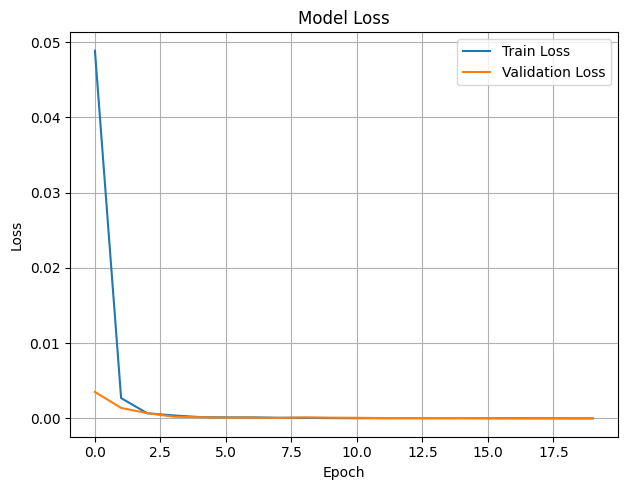

In [ ]:
# 학습곡선
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Validation Loss: 0.0000
✅ Validation Accuracy: 1.0000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

✅ Test Accuracy: 1.0000

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       638

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



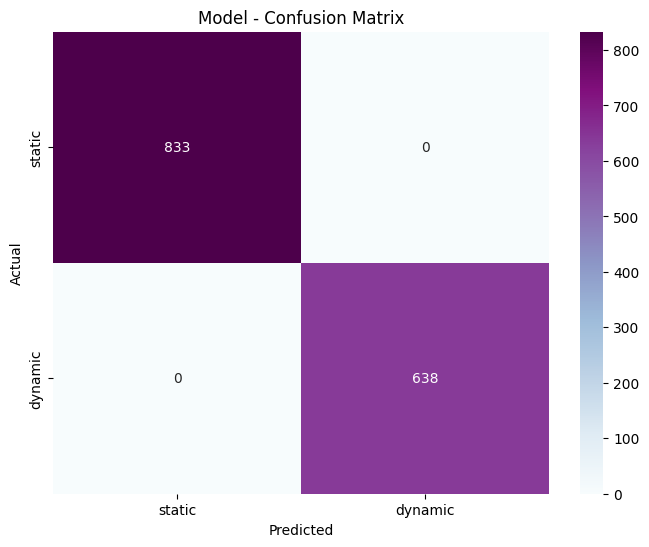

In [ ]:
# 예측 및 평가

val_loss, val_accuracy = model1.evaluate(X_val, y_val, verbose=0)
print(f"\n✅ Validation Loss: {val_loss:.4f}")
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")
# 테스트 예측
y_test_pred_prob = model1.predict(X_test_scaled)
y_test_pred_classes = (y_test_pred_prob > 0.5).astype("int32")

# 정확도
test_accuracy = accuracy_score(y_test, y_test_pred_classes)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")

# 분류 리포트
print("\n Classification Report:")
print(classification_report(y_test, y_test_pred_classes))
# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu',
            xticklabels=['static', 'dynamic'],
            yticklabels=['static', 'dynamic'])
plt.title("Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### 2) 모델2

In [ ]:
# 모델 설계
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_final.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

print(model1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        71,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,453 (970.52 KB)

 Trainable params: 82,817 (323.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,636 (647.02 KB)

None


In [ ]:
# 컴파일 및 학습
model2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 학습 과정 표시하며 학습 진행
history2 = model2.fit(
    X_train_final, y_train_final,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9518 - loss: 0.1161 - val_accuracy: 0.9992 - val_loss: 0.0012
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9999 - loss: 9.1998e-04 - val_accuracy: 0.9992 - val_loss: 0.0015
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 1.0000 - loss: 4.4853e-04 - val_accuracy: 1.0000 - val_loss: 7.7174e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 1.0000 - loss: 3.2358e-04 - val_accuracy: 1.0000 - val_loss: 5.8267e-05
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 1.0000 - loss: 1.8110e-04 - val_accuracy: 1.0000 - val_loss: 7.0217e-05
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 1.0000 - loss: 3.9907e-05 - val_accuracy: 1.0000 - val_loss: 4.1486e-05
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 1.1654e-04 - val_accuracy: 1.0000 - val_loss: 1.2008e-04
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 1.0000

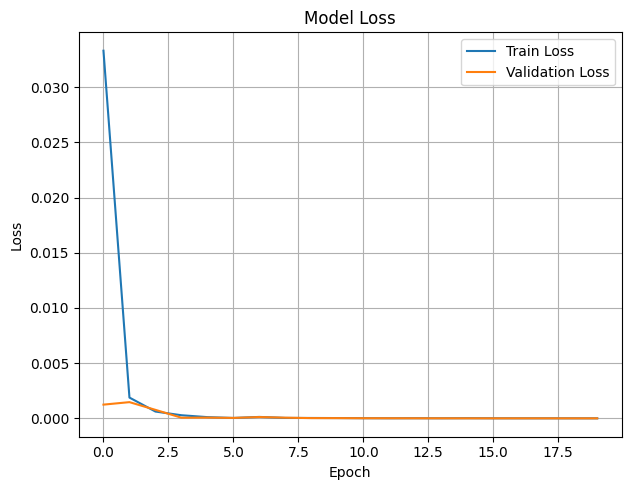

In [ ]:
# 학습곡선
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Validation Loss: 0.0000
✅ Validation Accuracy: 1.0000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

✅ Test Accuracy: 1.0000

 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       638

    accuracy                           1.00      1471
   macro avg       1.00      1.00      1.00      1471
weighted avg       1.00      1.00      1.00      1471



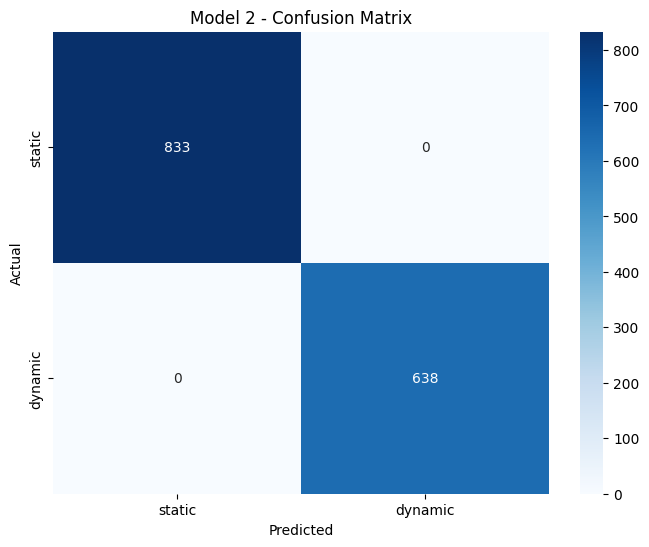

In [ ]:
# 예측 및 평가
# 검증 데이터 평가
val_loss, val_accuracy = model2.evaluate(X_val, y_val, verbose=0)
print(f"\n✅ Validation Loss: {val_loss:.4f}")
print(f"✅ Validation Accuracy: {val_accuracy:.4f}")

# 테스트 예측
y_test_pred_prob = model2.predict(X_test_scaled)
y_test_pred_classes = (y_test_pred_prob > 0.5).astype("int32")

# 정확도
test_accuracy = accuracy_score(y_test, y_test_pred_classes)
print(f"\n✅ Test Accuracy: {test_accuracy:.4f}")

# 분류 리포트
print("\n Classification Report:")
print(classification_report(y_test, y_test_pred_classes))

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['static', 'dynamic'],
            yticklabels=['static', 'dynamic'])
plt.title("Model 2 - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### (2) 단계2

#### 1) 단계2-1 : 정적 동작 세부 분류

* 세부 요구사항
    * 정적 행동(Laying, Sitting, Standing)인 데이터 추출
    * Laying, Sitting, Standing 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [ ]:
# 정적 동작만 필터링 (is_dynamic == 0)
static_data_train = data01_train[data01_train['is_dynamic'] == 0].copy()
static_data_test = data01_test[data01_test['is_dynamic'] == 0].copy()

print(" Static Data 추출 완료")
print(f"Train Set Shape: {static_data_train.shape}")
print(f"Test Set Shape : {static_data_test.shape}")
print("-" * 40)

 Static Data 추출 완료
Train Set Shape: (3234, 563)
Test Set Shape : (833, 563)
----------------------------------------


In [ ]:
# 대소문자 및 공백 정리
static_data_train['Activity'] = static_data_train['Activity'].str.upper().str.strip()
static_data_test['Activity'] = static_data_test['Activity'].str.upper().str.strip()

# 필요한 클래스만 필터링
target_static_labels = ['LAYING', 'SITTING', 'STANDING']
static_data_train = static_data_train[static_data_train['Activity'].isin(target_static_labels)].copy()
static_data_test = static_data_test[static_data_test['Activity'].isin(target_static_labels)].copy()

print("  문자열 정리 + 클래스 필터링 완료")
print("Train Activity Classes:", static_data_train['Activity'].unique())
print("Test Activity Classes :", static_data_test['Activity'].unique())
print("-" * 40)

  문자열 정리 + 클래스 필터링 완료
Train Activity Classes: ['STANDING' 'LAYING' 'SITTING']
Test Activity Classes : ['SITTING' 'STANDING' 'LAYING']
----------------------------------------


In [ ]:
# (tip) 인코딩 진행, map 활용해서 숫자레이블로 매핑핑
static_mapping = {'LAYING': 0, 'SITTING': 1, 'STANDING': 2}
static_data_train['Activity'] = static_data_train['Activity'].map(static_mapping)
static_data_test['Activity'] = static_data_test['Activity'].map(static_mapping)

# 결과 확인

print(" 라벨 매핑 완료")
print(static_data_train[['Activity']].value_counts().sort_index())
print(static_data_test[['Activity']].value_counts().sort_index())
print("-" * 40)

 라벨 매핑 완료
Activity
0           1115
1           1032
2           1087
Name: count, dtype: int64
Activity
0           292
1           254
2           287
Name: count, dtype: int64
----------------------------------------


In [ ]:
# 모델 설계

# X, y 분리
X_train_static = static_data_train.drop(columns=['Activity', 'is_dynamic'])
y_train_static = static_data_train['Activity']

X_test_static = static_data_test.drop(columns=['Activity', 'is_dynamic'])
y_test_static = static_data_test['Activity']

# 정규화
scaler_static = StandardScaler()
X_train_static_scaled = scaler_static.fit_transform(X_train_static)
X_test_static_scaled = scaler_static.transform(X_test_static)

print("Feature 분리 및 정규화 완료")
print(f"X_train_static_scaled Shape: {X_train_static_scaled.shape}")
print(f"y_train_static Shape       : {y_train_static.shape}")
print(f"X_test_static_scaled Shape : {X_test_static_scaled.shape}")
print(f"y_test_static Shape        : {y_test_static.shape}")
print("-" * 40)

model_static = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_static_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3개 클래스
])

Feature 분리 및 정규화 완료
X_train_static_scaled Shape: (3234, 561)
y_train_static Shape       : (3234,)
X_test_static_scaled Shape : (833, 561)
y_test_static Shape        : (833,)
----------------------------------------


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 컴파일 및 학습

model_static.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_static = model_static.fit(
    X_train_static_scaled, y_train_static,
    validation_data=(X_test_static_scaled, y_test_static),
    epochs=20,
    batch_size=32,
    verbose=2
)


Epoch 1/20
102/102 - 2s - 17ms/step - accuracy: 0.8652 - loss: 0.3422 - val_accuracy: 0.9256 - val_loss: 0.2305
Epoch 2/20
102/102 - 2s - 18ms/step - accuracy: 0.9549 - loss: 0.1318 - val_accuracy: 0.9628 - val_loss: 0.1232
Epoch 3/20
102/102 - 1s - 7ms/step - accuracy: 0.9811 - loss: 0.0577 - val_accuracy: 0.9628 - val_loss: 0.1157
Epoch 4/20
102/102 - 1s - 12ms/step - accuracy: 0.9833 - loss: 0.0453 - val_accuracy: 0.9700 - val_loss: 0.0884
Epoch 5/20
102/102 - 1s - 5ms/step - accuracy: 0.9892 - loss: 0.0382 - val_accuracy: 0.9628 - val_loss: 0.1385
Epoch 6/20
102/102 - 0s - 5ms/step - accuracy: 0.9898 - loss: 0.0488 - val_accuracy: 0.9664 - val_loss: 0.1239
Epoch 7/20
102/102 - 0s - 4ms/step - accuracy: 0.9904 - loss: 0.0631 - val_accuracy: 0.9760 - val_loss: 0.0935
Epoch 8/20
102/102 - 1s - 5ms/step - accuracy: 0.9978 - loss: 0.0103 - val_accuracy: 0.9700 - val_loss: 0.1098
Epoch 9/20
102/102 - 1s - 7ms/step - accuracy: 0.9978 - loss: 0.0099 - val_accuracy: 0.9784 - val_loss: 0.081

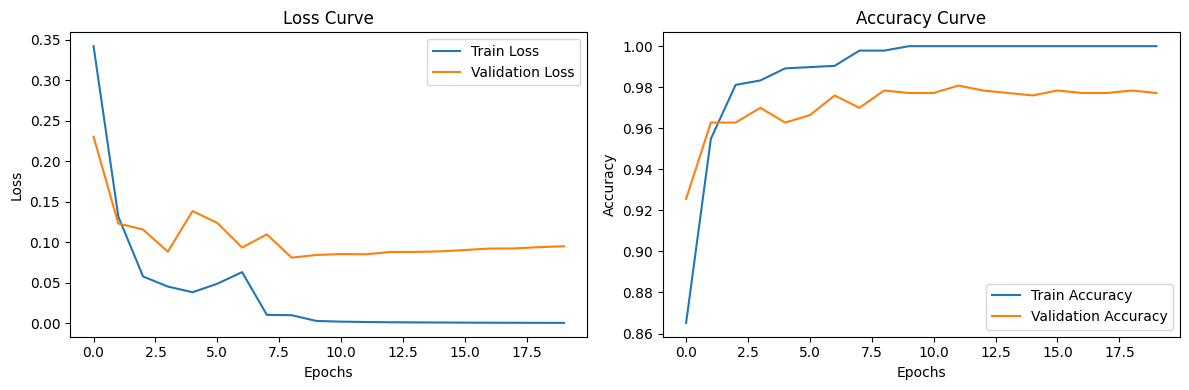

In [ ]:
# 학습곡선

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_static.history['loss'], label='Train Loss')
plt.plot(history_static.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_static.history['accuracy'], label='Train Accuracy')
plt.plot(history_static.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ Test Accuracy (MLP) - Static Actions: 0.9772


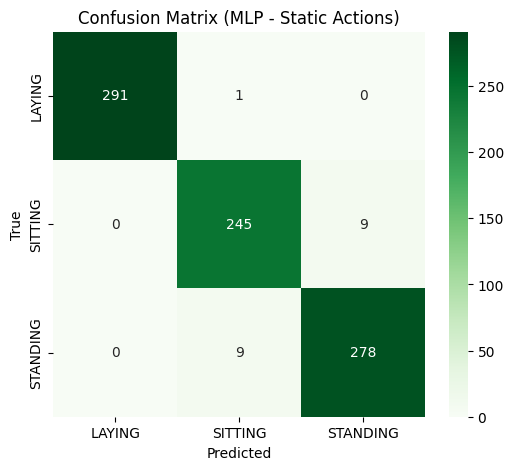


📄 Classification Report (Static Actions):
              precision    recall  f1-score   support

      LAYING       1.00      1.00      1.00       292
     SITTING       0.96      0.96      0.96       254
    STANDING       0.97      0.97      0.97       287

    accuracy                           0.98       833
   macro avg       0.98      0.98      0.98       833
weighted avg       0.98      0.98      0.98       833



In [ ]:
# 예측 및 평가
y_pred_static = model_static.predict(X_test_static_scaled).argmax(axis=1)

# 정확도
acc_static = accuracy_score(y_test_static, y_pred_static)
print(f"✅ Test Accuracy (MLP) - Static Actions: {acc_static:.4f}")

# Confusion Matrix
cm_static = confusion_matrix(y_test_static, y_pred_static)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_static, annot=True, fmt='d', cmap='Greens',
            xticklabels=static_mapping.keys(), yticklabels=static_mapping.keys())
plt.title("Confusion Matrix (MLP - Static Actions)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\n📄 Classification Report (Static Actions):")
print(classification_report(y_test_static, y_pred_static, target_names=static_mapping.keys()))


#### 2) 단계2-2 : 동적 동작 세부 분류

* 세부 요구사항
    * 동적 행동(Walking, Walking Upstairs, Walking Downstairs)인 데이터 추출
    * Walking, Walking Upstairs, Walking Downstairs 를 분류하는 모델을 생성
    * 몇가지 모델을 만들고 가장 성능이 좋은 모델을 선정하시오.

In [ ]:
# (tip) 동적 행동(1)인 데이터 추출


dynamic_data_train = data01_train[data01_train['is_dynamic'] == 1].copy()
dynamic_data_test = data01_test[data01_test['is_dynamic'] == 1].copy()

print(" Dynamic Data 추출 완료")
print(f"Train Set Shape: {dynamic_data_train.shape}")
print(f"Test Set Shape : {dynamic_data_test.shape}")
print("-" * 40)

 Dynamic Data 추출 완료
Train Set Shape: (2647, 563)
Test Set Shape : (638, 563)
----------------------------------------


In [ ]:
# (tip) map 활용해서 숫자레이블로 매핑핑

dynamic_data_train['Activity'] = dynamic_data_train['Activity'].str.upper().str.strip()
dynamic_data_test['Activity'] = dynamic_data_test['Activity'].str.upper().str.strip()

# 필요한 클래스 필터링
target_dynamic_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS']
dynamic_data_train = dynamic_data_train[dynamic_data_train['Activity'].isin(target_dynamic_labels)].copy()
dynamic_data_test = dynamic_data_test[dynamic_data_test['Activity'].isin(target_dynamic_labels)].copy()

print(" 문자열 정리 + 클래스 필터링 완료")
print("Train Activity Classes:", dynamic_data_train['Activity'].unique())
print("Test Activity Classes :", dynamic_data_test['Activity'].unique())
print("-" * 40)

dynamic_mapping = {'WALKING': 0, 'WALKING_UPSTAIRS': 1, 'WALKING_DOWNSTAIRS': 2}
dynamic_data_train['Activity'] = dynamic_data_train['Activity'].map(dynamic_mapping)
dynamic_data_test['Activity'] = dynamic_data_test['Activity'].map(dynamic_mapping)

print(" 라벨 매핑 완료")
print(dynamic_data_train[['Activity']].value_counts().sort_index())
print(dynamic_data_test[['Activity']].value_counts().sort_index())
print("-" * 40)

 문자열 정리 + 클래스 필터링 완료
Train Activity Classes: ['WALKING' 'WALKING_DOWNSTAIRS' 'WALKING_UPSTAIRS']
Test Activity Classes : ['WALKING' 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS']
----------------------------------------
 라벨 매핑 완료
Activity
0           998
1           858
2           791
Name: count, dtype: int64
Activity
0           228
1           215
2           195
Name: count, dtype: int64
----------------------------------------


In [ ]:

X_train_dynamic = dynamic_data_train.drop(columns=['Activity', 'is_dynamic'])
y_train_dynamic = dynamic_data_train['Activity']

X_test_dynamic = dynamic_data_test.drop(columns=['Activity', 'is_dynamic'])
y_test_dynamic = dynamic_data_test['Activity']

# 정규화
scaler_dynamic = StandardScaler()
X_train_dynamic_scaled = scaler_dynamic.fit_transform(X_train_dynamic)
X_test_dynamic_scaled = scaler_dynamic.transform(X_test_dynamic)

print(" Feature 분리 및 정규화 완료")
print(f"X_train_dynamic_scaled Shape: {X_train_dynamic_scaled.shape}")
print(f"y_train_dynamic Shape       : {y_train_dynamic.shape}")
print(f"X_test_dynamic_scaled Shape : {X_test_dynamic_scaled.shape}")
print(f"y_test_dynamic Shape        : {y_test_dynamic.shape}")
print("-" * 40)

 Feature 분리 및 정규화 완료
X_train_dynamic_scaled Shape: (2647, 561)
y_train_dynamic Shape       : (2647,)
X_test_dynamic_scaled Shape : (638, 561)
y_test_dynamic Shape        : (638,)
----------------------------------------


In [ ]:
# 모델 설계

model_dynamic = Sequential([
    Dense(128, activation='relu', input_dim=X_train_dynamic_scaled.shape[1]),
    Dense(64, activation='relu'),
    Dense(len(dynamic_mapping), activation='softmax')  # 다중 클래스 분류
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 컴파일
model_dynamic.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 학습
history_dynamic = model_dynamic.fit(
    X_train_dynamic_scaled, y_train_dynamic,
    validation_data=(X_test_dynamic_scaled, y_test_dynamic),
    epochs=20,
    batch_size=32,
    verbose=2
)

Epoch 1/20
83/83 - 2s - 28ms/step - accuracy: 0.9433 - loss: 0.1598 - val_accuracy: 0.9984 - val_loss: 0.0202
Epoch 2/20
83/83 - 1s - 7ms/step - accuracy: 0.9989 - loss: 0.0064 - val_accuracy: 0.9969 - val_loss: 0.0098
Epoch 3/20
83/83 - 1s - 8ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9984 - val_loss: 0.0074
Epoch 4/20
83/83 - 1s - 7ms/step - accuracy: 1.0000 - loss: 9.7944e-04 - val_accuracy: 0.9984 - val_loss: 0.0058
Epoch 5/20
83/83 - 0s - 5ms/step - accuracy: 1.0000 - loss: 6.1743e-04 - val_accuracy: 0.9984 - val_loss: 0.0052
Epoch 6/20
83/83 - 1s - 8ms/step - accuracy: 1.0000 - loss: 4.2727e-04 - val_accuracy: 0.9984 - val_loss: 0.0045
Epoch 7/20
83/83 - 0s - 4ms/step - accuracy: 1.0000 - loss: 3.1717e-04 - val_accuracy: 0.9984 - val_loss: 0.0041
Epoch 8/20
83/83 - 0s - 4ms/step - accuracy: 1.0000 - loss: 2.4357e-04 - val_accuracy: 0.9984 - val_loss: 0.0038
Epoch 9/20
83/83 - 1s - 8ms/step - accuracy: 1.0000 - loss: 1.9266e-04 - val_accuracy: 0.9984 - val_loss: 0

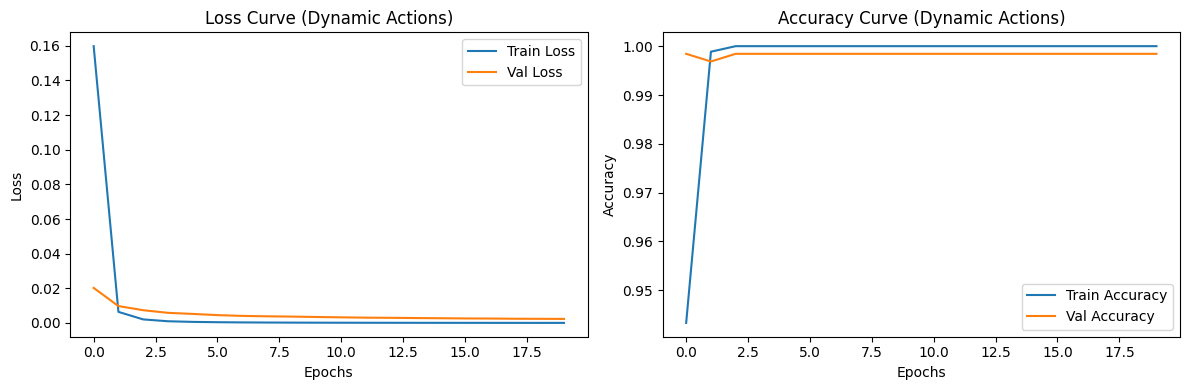

In [ ]:
#학슴곡선

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_dynamic.history['loss'], label='Train Loss')
plt.plot(history_dynamic.history['val_loss'], label='Val Loss')
plt.title('Loss Curve (Dynamic Actions)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dynamic.history['accuracy'], label='Train Accuracy')
plt.plot(history_dynamic.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve (Dynamic Actions)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 Test Accuracy - Dynamic Actions: 0.9984


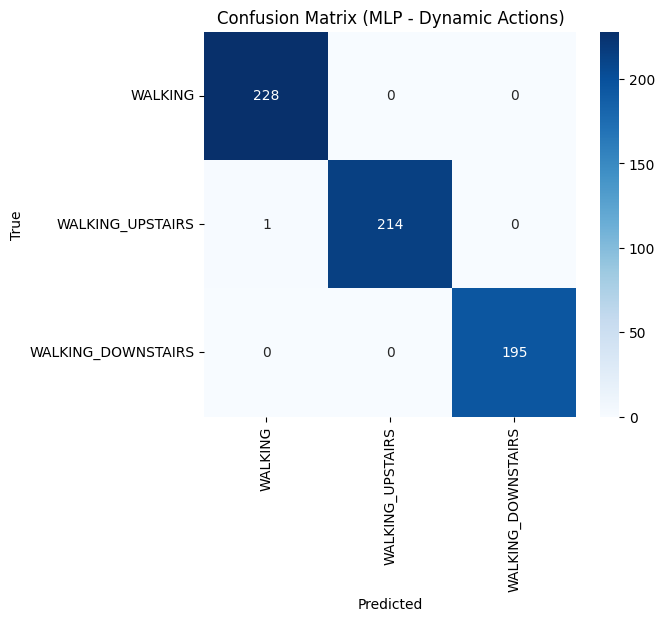


Classification Report:
                    precision    recall  f1-score   support

           WALKING       1.00      1.00      1.00       228
  WALKING_UPSTAIRS       1.00      1.00      1.00       215
WALKING_DOWNSTAIRS       1.00      1.00      1.00       195

          accuracy                           1.00       638
         macro avg       1.00      1.00      1.00       638
      weighted avg       1.00      1.00      1.00       638



In [ ]:
# 예측 및 평가

y_pred_dynamic = model_dynamic.predict(X_test_dynamic_scaled).argmax(axis=1)

# 정확도
acc_dynamic = accuracy_score(y_test_dynamic, y_pred_dynamic)
print(f" Test Accuracy - Dynamic Actions: {acc_dynamic:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test_dynamic, y_pred_dynamic)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dynamic_mapping.keys(), yticklabels=dynamic_mapping.keys())
plt.title("Confusion Matrix (MLP - Dynamic Actions)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_dynamic, y_pred_dynamic, target_names=dynamic_mapping.keys()))

### (3) (옵션) 분류 모델 파이프라인 구성


* 세부 요구사항
    * 두 단계 모델을 통합하고, 새로운 데이터(test)에 대해서 최종 예측결과와 성능평가가 나오도록 함수로 만들기
    * 데이터 파이프라인 구축 : test데이터가 로딩되어 전처리 과정을 거치고, 예측 및 성능 평가 수행

* 예시
![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

#### 1) 함수 만들기

In [ ]:
def activity_classification_pipeline(test_data, scaler_stage1, scaler_static, scaler_dynamic):
    """
    전체 예측 파이프라인: 전처리 → 모델1 → 모델2 분기 → 예측합치기 → 평가
    """

    # 1. 전처리 ------------------------------------------------------
    # 데이터 복사
    test_data_copy = test_data.copy()

    # 타겟값 추출 (대소문자 및 공백 정리)
    test_data_copy['Activity'] = test_data_copy['Activity'].str.upper().str.strip()
    y_true = test_data_copy['Activity'].copy()

    # 입력값 준비 (Activity 열만 제외)
    X_test = test_data_copy.drop(columns=['Activity'])

    # 스케일링 (1단계 모델용)
    X_test_scaled_stage1 = scaler_stage1.transform(X_test)

    # 2. 단계1 예측 : 정적 / 동적 구분 ------------------------------
    pred_stage1 = model1.predict(X_test_scaled_stage1)
    pred_stage1 = (pred_stage1 > 0.5).astype(int).reshape(-1)

    # 결과 저장
    test_data_copy['stage1_pred'] = pred_stage1

    # 3. 단계2 예측 --------------------------------------------------
    # 정적 예측
    static_data = test_data_copy[test_data_copy['stage1_pred'] == 0]
    static_labels = pd.Series(dtype=int)

    if not static_data.empty:
        X_static = static_data.drop(columns=['Activity', 'stage1_pred'])
        X_static_scaled = scaler_static.transform(X_static)
        static_preds = model_static.predict(X_static_scaled).argmax(axis=1)
        static_labels = pd.Series(static_preds, index=static_data.index)

    # 동적 예측
    dynamic_data = test_data_copy[test_data_copy['stage1_pred'] == 1]
    dynamic_labels = pd.Series(dtype=int)

    if not dynamic_data.empty:
        X_dynamic = dynamic_data.drop(columns=['Activity', 'stage1_pred'])
        X_dynamic_scaled = scaler_dynamic.transform(X_dynamic)
        dynamic_preds = model_dynamic.predict(X_dynamic_scaled).argmax(axis=1)
        dynamic_labels = pd.Series(dynamic_preds, index=dynamic_data.index)

    # 4. 예측결과 합치기 ---------------------------------------------
    # 디코딩 매핑
    inverse_static = {v: k for k, v in static_mapping.items()}
    inverse_dynamic = {v: k for k, v in dynamic_mapping.items()}

    # 인덱스 순서 맞춰 합치기
    final_pred = pd.Series(dtype=int)

    if not static_labels.empty:
        final_pred = pd.concat([final_pred, static_labels])

    if not dynamic_labels.empty:
        final_pred = pd.concat([final_pred, dynamic_labels])

    final_pred = final_pred.sort_index()

    # 예측 결과를 원래 레이블로 변환
    final_pred_label = pd.Series(index=final_pred.index, dtype=object)

    # 정적 예측 결과 변환
    static_indices = static_data.index
    for idx in static_indices:
        if idx in final_pred.index:
            final_pred_label[idx] = inverse_static.get(final_pred[idx], "Unknown")

    # 동적 예측 결과 변환
    dynamic_indices = dynamic_data.index
    for idx in dynamic_indices:
        if idx in final_pred.index:
            final_pred_label[idx] = inverse_dynamic.get(final_pred[idx], "Unknown")

    # 5. 평가 ---------------------------------------------------------
    print(" 전체 정확도:")
    print(accuracy_score(y_true, final_pred_label))

    print("\n 분류 리포트:")
    print(classification_report(y_true, final_pred_label))

    print("\n 혼동 행렬:")
    cm = confusion_matrix(y_true, final_pred_label,
                          labels=list(static_mapping.keys()) + list(dynamic_mapping.keys()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=list(static_mapping.keys()) + list(dynamic_mapping.keys()),
                yticklabels=list(static_mapping.keys()) + list(dynamic_mapping.keys()))
    plt.title("Overall Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    return final_pred_label

#### 2) test 셋으로 예측하고 평가하기

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
 전체 정확도:
0.9864038069340585

 분류 리포트:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       292
           SITTING       0.96      0.96      0.96       254
          STANDING       0.97      0.97      0.97       287
           WALKING       1.00      1.00      1.00       228
WALKING_DOWNSTAIRS       1.00      1.00      1.00       195
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471


 혼동 행렬:


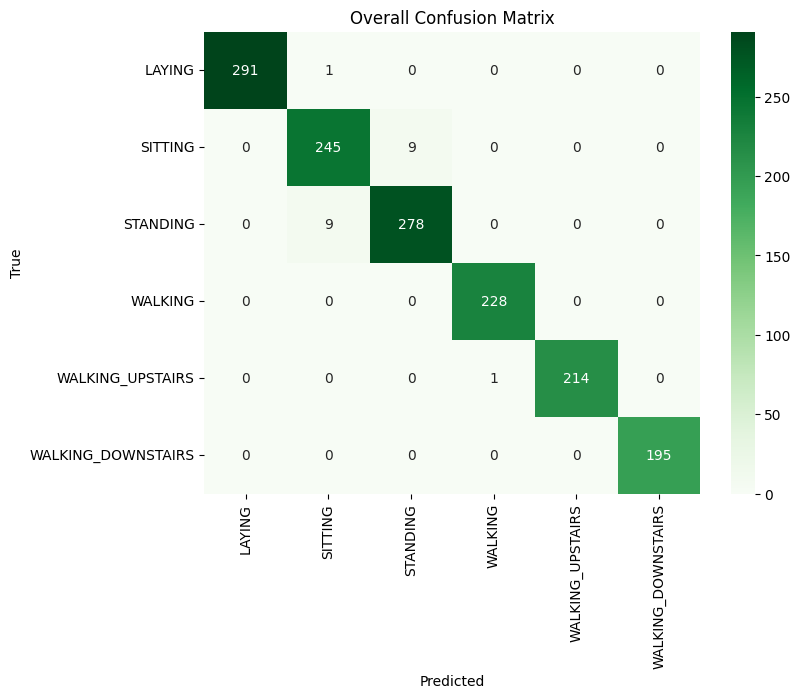

In [ ]:
# test 셋의 구조 한번 확인해보고 성능평가 해보기
# 1. 테스트 데이터 불러오기 (예: data01_test)

# 1단계 모델용 스케일러
X_train_for_stage1 = data01_train.drop(columns=['Activity', 'is_dynamic'])
scaler_stage1 = StandardScaler()
scaler_stage1.fit(X_train_for_stage1)

# 정적 모델용 스케일러
X_train_static_for_scaler = static_data_train.drop(columns=['Activity', 'is_dynamic'])
scaler_static = StandardScaler()
scaler_static.fit(X_train_static_for_scaler)

# 동적 모델용 스케일러
X_train_dynamic_for_scaler = dynamic_data_train.drop(columns=['Activity', 'is_dynamic'])
scaler_dynamic = StandardScaler()
scaler_dynamic.fit(X_train_dynamic_for_scaler)

# 테스트 데이터에서 is_dynamic 열 제거 (이미 있다면)
test_data_for_pipeline = data01_test.copy()
if 'is_dynamic' in test_data_for_pipeline.columns:
    test_data_for_pipeline = test_data_for_pipeline.drop(columns=['is_dynamic'])

# 파이프라인 함수 호출
predictions = activity_classification_pipeline(test_data_for_pipeline, scaler_stage1, scaler_static, scaler_dynamic)
